<a href="https://colab.research.google.com/github/aryan-at-ul/customer_segmentation/blob/main/weighted_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

there was a slight improvement when adding sample weights. score has increased.

sample_weight -> array-like of shape (n_samples,), default=None
The weights for each observation in X. If None, all observations are assigned equal weight.

doc: [sklear](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
data_path = "/content/drive/MyDrive/customer_segmentation/segmentation data.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd
import scipy 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import pickle
#sns skin on matplotlib
sns.set()

In [ ]:
df_segmentation = pd.read_csv(data_path,index_col = 0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
# df_seg = df_segmentation
df_seg = df_segmentation.drop(['Income'], 1)
Y = np.array(df_segmentation['Income'].astype(float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
scalar = StandardScaler()
segmentation_std = scalar.fit_transform(df_seg)

k_means = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
k_means.fit(segmentation_std , sample_weight = Y)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_seg['Income'] = Y

In [ ]:
df_segmentation_kmans = df_seg.copy()
df_segmentation_kmans['Segment K-means'] = k_means.labels_

In [ ]:
df_segmentation_analysis = df_segmentation_kmans.groupby(['Segment K-means']).mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Occupation,Settlement size,Income
Segment K-means,,,,,,,
0,0.003752,0.131332,35.939962,0.714822,1.270169,1.551595,139799.187617
1,0.841292,0.995787,28.335674,1.036517,0.692416,0.474719,109137.976124
2,0.508591,0.694158,55.570447,2.123711,1.006873,0.993127,150286.546392
3,0.355603,0.025862,35.163793,0.730603,0.340517,0.051724,99043.635776


In [ ]:
df_segmentation_analysis['N observation'] = df_segmentation_kmans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segmentation_analysis['proportation observation'] = df_segmentation_analysis['N observation'] / df_segmentation_analysis['N observation'].sum()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Occupation,Settlement size,Income,N observation,proportation observation
Segment K-means,,,,,,,,,
0,0.003752,0.131332,35.939962,0.714822,1.270169,1.551595,139799.187617,533,0.2665
1,0.841292,0.995787,28.335674,1.036517,0.692416,0.474719,109137.976124,712,0.3560
2,0.508591,0.694158,55.570447,2.123711,1.006873,0.993127,150286.546392,291,0.1455
3,0.355603,0.025862,35.163793,0.730603,0.340517,0.051724,99043.635776,464,0.2320


In [ ]:
df_segmentation_analysis.rename({
    0:'career focused',
    1:'standard',
    2:'well-off',
    3:'fewer-opportunities'

})

,Sex,Marital status,Age,Education,Occupation,Settlement size,Income,N observation,proportation observation
Segment K-means,,,,,,,,,
career focused,0.003752,0.131332,35.939962,0.714822,1.270169,1.551595,139799.187617,533,0.2665
standard,0.841292,0.995787,28.335674,1.036517,0.692416,0.474719,109137.976124,712,0.3560
well-off,0.508591,0.694158,55.570447,2.123711,1.006873,0.993127,150286.546392,291,0.1455
fewer-opportunities,0.355603,0.025862,35.163793,0.730603,0.340517,0.051724,99043.635776,464,0.2320


In [ ]:

df_segmentation_kmans['Labels'] = df_segmentation_kmans['Segment K-means'].map({
    0:'career focused',
    1:'standard',
    2:'well-off',
    3:'fewer-opportunities'
})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Segmentation using K-means')

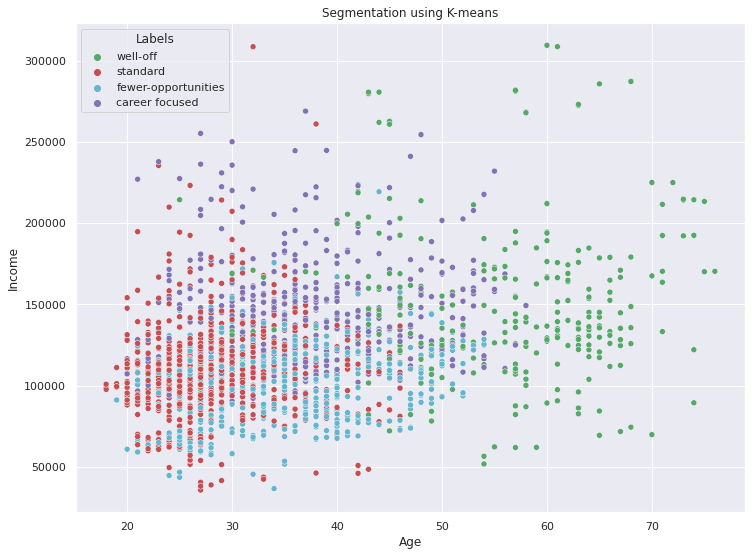

In [ ]:
x_axis = df_segmentation_kmans['Age']
y_axis = df_segmentation_kmans['Income']

plt.figure(figsize = (12,9))
sns.scatterplot(x_axis,y_axis, hue = df_segmentation_kmans['Labels'], palette = ['g','r','c','m'])
plt.title('Segmentation using K-means')

In [ ]:
print(f'silhouette_score: {silhouette_score(segmentation_std,k_means.labels_)}') #0.26 for simple k-means

silhouette_score: 0.3012028007661341


In [ ]:
df_seg = df_segmentation.drop(['Income'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:

pca = PCA(n_components= 3)
pca.fit(segmentation_std)



PCA(n_components=3)

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_seg.columns.values,
                           index = ['Component 1','Component 2','Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Occupation,Settlement size
Component 1,-0.563341,-0.470682,0.223055,-0.124579,0.414198,0.473574
Component 2,0.164383,0.280903,0.554945,0.702899,0.232463,0.194938
Component 3,-0.235751,-0.450715,0.483694,0.153505,-0.523327,-0.458129


([<matplotlib.axis.YTick at 0x7f9c803dfb90>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

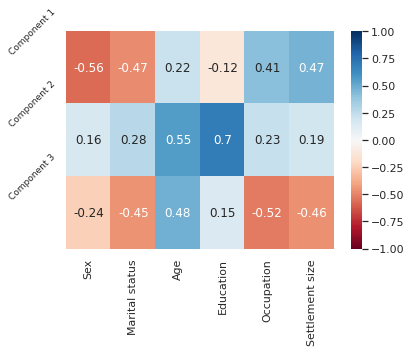

In [ ]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1, 
            annot = True,
            cmap = 'RdBu')
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 45,
           fontsize = 9)


In [ ]:
score_pca = pca.transform(segmentation_std) #pca score
score_pca

array([[ 2.23432923,  2.54214625,  1.32715544],
       [-0.48686916,  0.13033053, -2.16129701],
       [ 0.28466704, -0.326703  ,  2.27571062],
       ...,
       [ 0.14974706, -2.35148636,  1.2766131 ],
       [-2.26353589, -0.6190063 , -0.13107789],
       [ 0.03552062, -2.63567355,  1.02891385]])

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
kmeans_pca.fit(score_pca , sample_weight = Y)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_seg_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True),pd.DataFrame(score_pca)],axis = 1)
df_seg_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']

df_seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.234329,2.542146,1.327155,2
1,1,1,22,1,150773,1,2,-0.486869,0.130331,-2.161297,0
2,0,0,49,1,89210,0,0,0.284667,-0.326703,2.275711,3
3,0,0,45,1,171565,1,1,1.440276,0.087931,0.726895,1
4,0,0,53,1,149031,1,1,1.592578,0.466847,1.057161,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.884281,-0.091443,1.719888,3
1996,1,1,27,1,117744,1,0,-1.557645,-0.112794,-0.826941,0
1997,0,0,31,0,86400,0,0,0.149747,-2.351486,1.276613,3
1998,1,1,24,1,97968,0,0,-2.263536,-0.619006,-0.131078,0


In [ ]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_seg_pca_kmeans_freq #career, education lifestyle, experience

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.884892,0.972662,28.388489,1.037410,110531.992806,0.728058,0.490647,-1.273467,-0.037796,-0.734719
1,0.003731,0.136194,35.940299,0.716418,139866.707090,1.268657,1.548507,1.688354,-0.366400,-0.373817
2,0.508591,0.694158,55.570447,2.123711,150286.546392,1.006873,0.993127,0.179881,2.464509,0.582745
3,0.311715,0.087866,34.838912,0.738494,97044.274059,0.297071,0.037657,-0.151138,-1.034546,1.132671


In [ ]:
df_seg_pca_kmeans_freq['N observations'] = df_seg_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_seg_pca_kmeans_freq['Proportion of Observations'] = df_seg_pca_kmeans_freq['N observations'] / df_seg_pca_kmeans_freq['N observations'].sum()

df_seg_pca_kmeans_freq = df_seg_pca_kmeans_freq.rename({
    0:'standard',
    1:'career focused',
    2:'well-off',
    3:'fewer-opportunities'
})

df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N observations,Proportion of Observations
Segment K-means PCA,,,,,,,,,,,,
standard,0.884892,0.972662,28.388489,1.037410,110531.992806,0.728058,0.490647,-1.273467,-0.037796,-0.734719,695,0.3475
career focused,0.003731,0.136194,35.940299,0.716418,139866.707090,1.268657,1.548507,1.688354,-0.366400,-0.373817,536,0.2680
well-off,0.508591,0.694158,55.570447,2.123711,150286.546392,1.006873,0.993127,0.179881,2.464509,0.582745,291,0.1455
fewer-opportunities,0.311715,0.087866,34.838912,0.738494,97044.274059,0.297071,0.037657,-0.151138,-1.034546,1.132671,478,0.2390


In [ ]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment K-means PCA'].map({
    0: 'standard',
    1: 'career focused',
    2: 'fewer opportunities',
    3: 'well-off'
})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


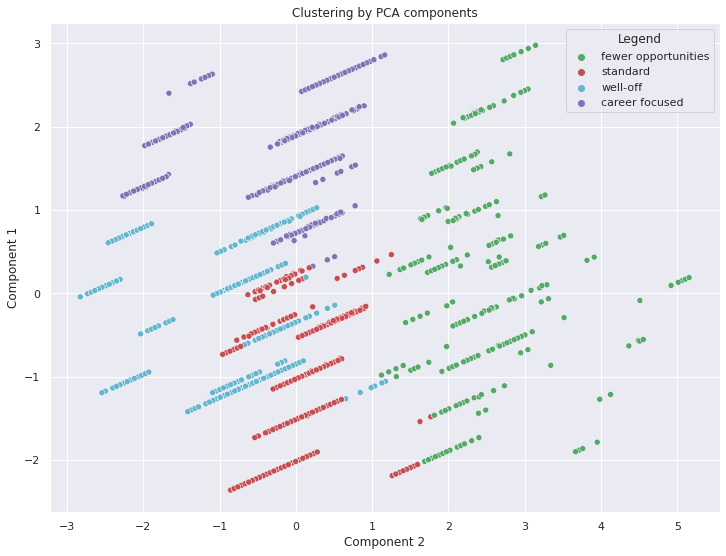

In [ ]:
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (12,9))

sns.scatterplot(x_axis,y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clustering by PCA components')
plt.show()

In [ ]:
print(f'silhouette_score: {silhouette_score(score_pca,kmeans_pca.labels_)}')
print(f'calinski_harabasz_score: {calinski_harabasz_score(score_pca,kmeans_pca.labels_)}')
print(f'davies_bouldin_score: {davies_bouldin_score(score_pca,kmeans_pca.labels_)}')

silhouette_score: 0.3661613690150442
calinski_harabasz_score: 1068.9322775516096
davies_bouldin_score: 0.977068895202719
